## Biofilm Example - Multidimensional Modeling

In this example, we are going to simulate the diffusion and uptake of a substrate in a biofilm. 
![Biofilm](http://explorer.bee.oregonstate.edu/Topic/Modeling/Images/Biofilm.png).

**The model is:**

$\large \frac{\partial S}{\partial t} = \frac{\partial ^2S}{\partial x^2} -kSB$

**The model assumes the following:**

1. The biofilm is 10mm thick
2. The diffusivity of the substrate S in the biofilm is 0.48 mm^2/hour
3. Bacteria are uniformly distributed across the biofilm at a constant concentration of 24 mg/L 
4. The substrate is consumed by bacteria at a rate proportional to the amount of bacteria and the amount of substrate, with a rate constant of 0.00065 
5. The left hand side boundary condition is a fixed concentration of S (10 mg/L)
6. The right hand side boundary condition is the flux dS/dx = 0
7. We want to run a simulation for 200 hours, using a time step of 0.01, and a space step of 0.25

Lambda=0.0768
[  0.     0.25   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25
   2.5    2.75   3.     3.25   3.5    3.75   4.     4.25   4.5    4.75   5.
   5.25   5.5    5.75   6.     6.25   6.5    6.75   7.     7.25   7.5
   7.75   8.     8.25   8.5    8.75   9.     9.25   9.5    9.75  10.  ]


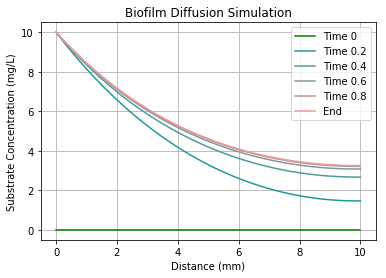

In [53]:
# Model: du/dt = d2u/dx2 + kBS (assume uniform, unchanging bacteria in film)
# left boundary condition: dS/dx = 0
# right boundary condition: S = S0

import numpy as np
import math
import matplotlib.pyplot as plt

endTime = 200      # units - hours
width = 10         # units - mm
dt = 0.01          # units - hours
dx = 0.25          # units - mm
diffusivity = 0.48 # units - mm2/hr
k = 0.00065        # first order reaction term
B =  24            # bacterial concentration in biofilm, mg/L

# get grid dimensions
times = np.arange(0, endTime+dt/2, dt)
distances = np.arange( 0, width+dx/2, dx )
rows = len( times )
cols = len( distances )

np.

# make a grid to contain state values through space and time
u = np.zeros( (rows, cols) )

# set boundary conditions (left side only)
u[:,0] = 10

# set initial conditions
u[0,:] = 0   # mg/L     # Note that rows represent time, columns represent space

lmbda = diffusivity * dt/(dx*dx)
print( "Lambda={:.3}".format(lmbda))

# make a function that will solve a single node, based on neighbor values
def SolveNode( uLeft, ui, uRight ):
    # u[j,i] = lambda*u[j-1,i-1] + (1+2*lambda)*ui + lambda*u[j-1,i+1]
    uu = lmbda*uLeft + (1-2*lmbda)*ui + lmbda*uRight - k*B*ui*dt
    return uu

# ready to solve, iterate through time, then columns (except BC columns)
for j in range( 1, rows ):   # note starting index
    
    # iterate through interior nodes, up to right hand boundary
    for i in range(1, cols-1 ):  # note starting index
        u[j,i] = SolveNode(u[j-1, i-1], u[j-1, i], u[j-1, i+1])
        
    # apply right hand side boundary condition
    u[j,-1] = u[j,-2]
    
# model run, plot selected time slices
print( distances )
plt.plot( distances, u[0,:], 'g', label="Time 0" )
plt.plot( distances, u[int(0.2*endTime/dt),:], '#209999', label="Time 0.2")
plt.plot( distances, u[int(0.4*endTime/dt),:], '#509999', label="Time 0.4")
plt.plot( distances, u[int(0.6*endTime/dt),:], '#809999', label="Time 0.6")
plt.plot( distances, u[int(0.8*endTime/dt),:], '#B09999', label="Time 0.8")
plt.plot( distances, u[-1,:], '#F09999', label="End")
plt.legend()
plt.title("Biofilm Diffusion Simulation")
plt.xlabel("Distance (mm)")
plt.ylabel("Substrate Concentration (mg/L)")
plt.grid()
plt.show()



In [10]:
a = 1.1111122231232131231232
b = 5
print( "a={:.2}, b={}".format(a,b))

a=1.1, b=5
